# 1. Exploratory Data Analysis

## 1.1 White noise series

### 1.1.1

In [1]:
from random import gauss
from random import seed
from pandas import Series

N=1000
# seed the random number generator
seed(10)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(N)]
series = Series(series)

actual_mean = series.mean()
actual_std = series.std()
print("Actual Mean: ", actual_mean)
print("Actual Standard Deviation: ", actual_std)

Actual Mean:  -0.07120429237582042
Actual Standard Deviation:  0.9922827480232803


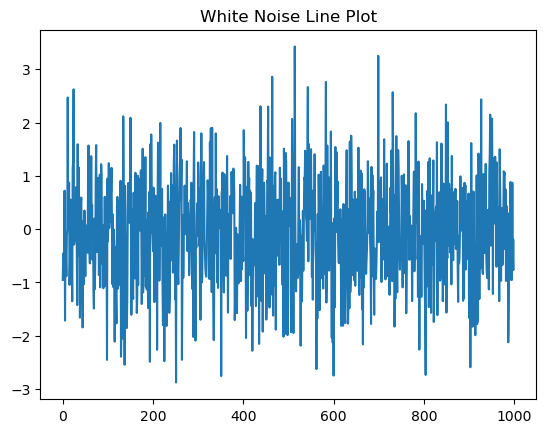

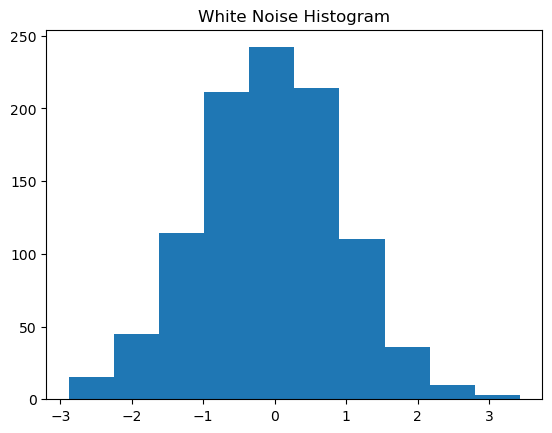

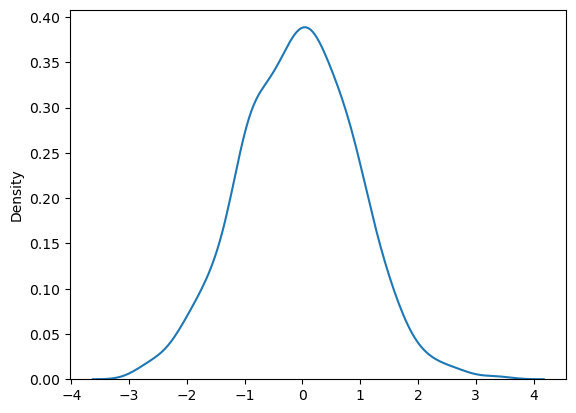

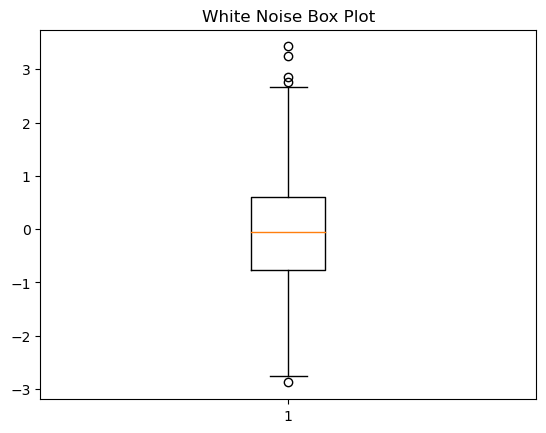

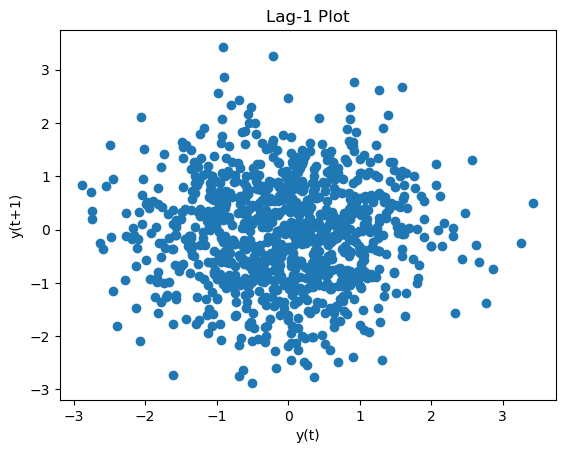

c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


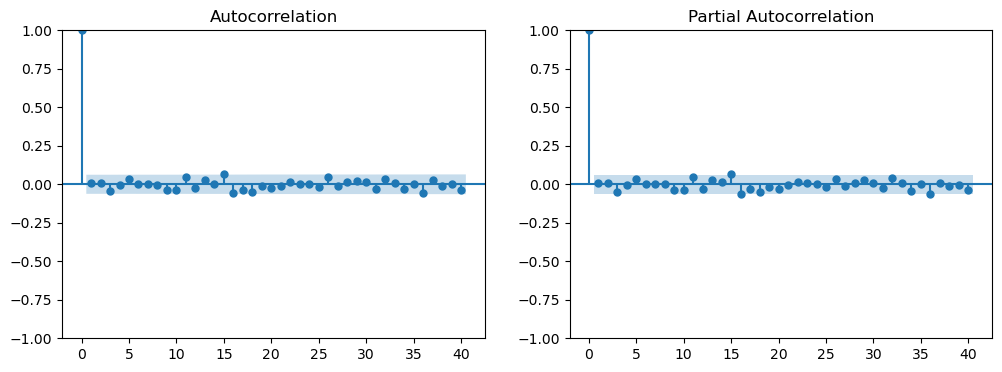

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def series_plot(white_noise):
    # Line plot
    plt.plot(white_noise)
    plt.title('White Noise Line Plot')
    plt.show()

    # Histogram
    plt.hist(white_noise)
    plt.title('White Noise Histogram')
    plt.show()

    # Density plot
    sns.kdeplot(white_noise)
    plt.show()

    # Box plot
    plt.boxplot(white_noise)
    plt.title('White Noise Box Plot')
    plt.show()

    # Lag-1 plot
    plt.scatter(white_noise[:-1], white_noise[1:])
    plt.xlabel('y(t)')
    plt.ylabel('y(t+1)')
    plt.title('Lag-1 Plot')
    plt.show()

    # ACF and PACF plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(white_noise, lags=40, ax=ax1)
    plot_pacf(white_noise, lags=40, ax=ax2)
    plt.show()

series_plot(series)


### 1.1.2

Actual Mean:  0.004170518169858113
Actual Standard Deviation:  0.0987709856222227


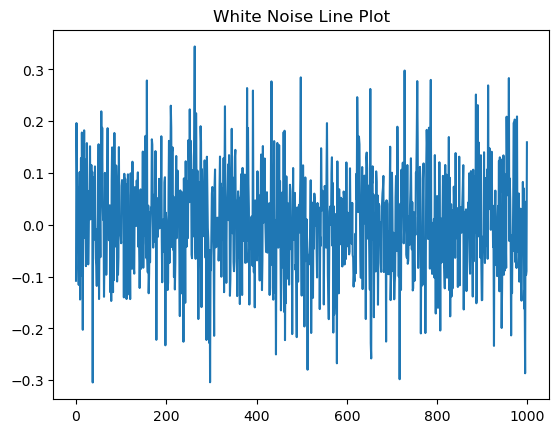

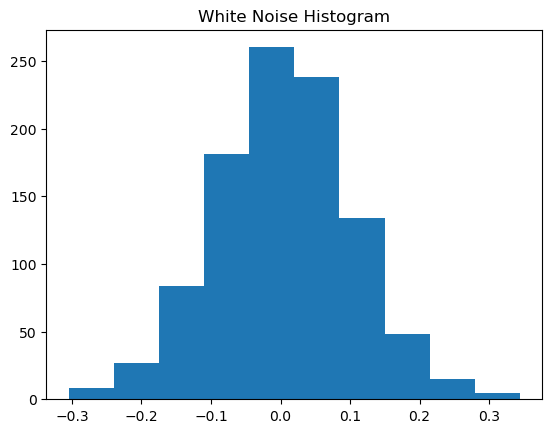

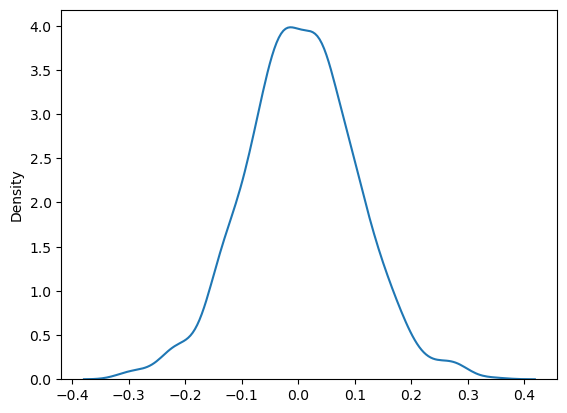

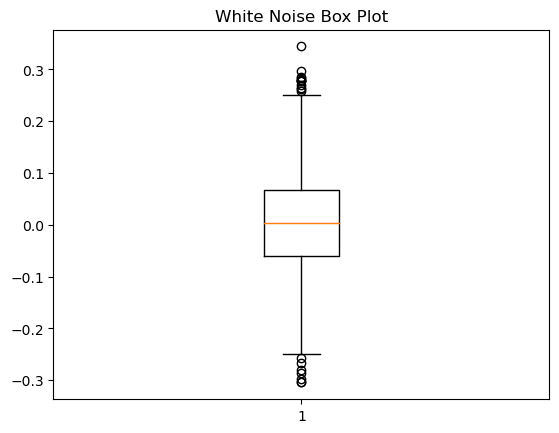

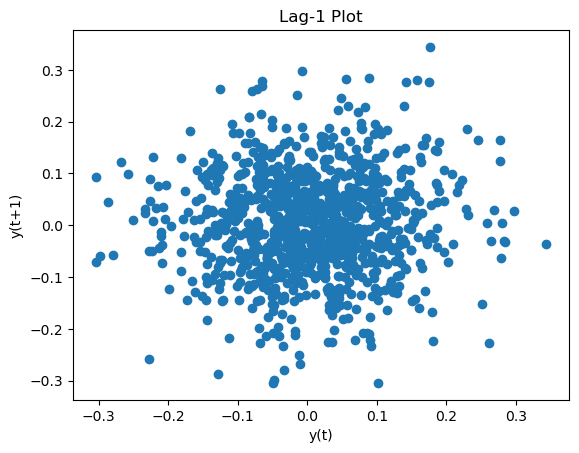

c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


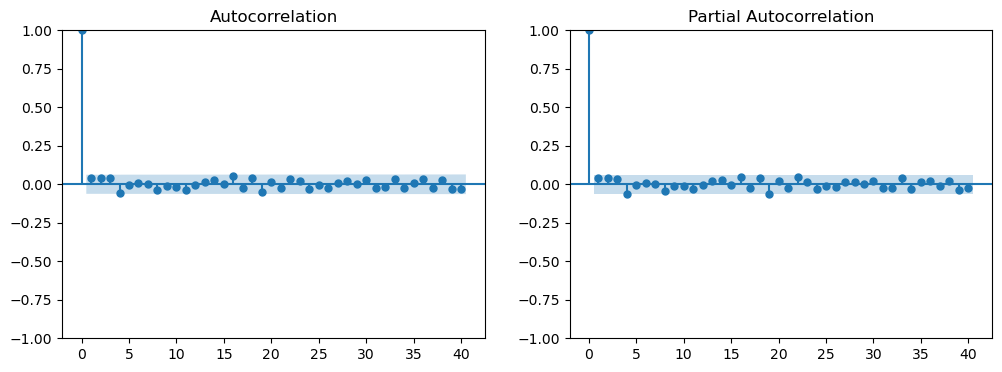

In [3]:
from random import gauss
from random import seed
from pandas import Series
import numpy as np

random_series= []
for i in range(100):
    seed(i)
    series_2 = [gauss(0.0, 1.0) for i in range(1000)]
    random_series.append(series_2)

average_series = np.mean(random_series, axis = 0)

actual_mean = average_series.mean()
actual_std = average_series.std()
print("Actual Mean: ", actual_mean)
print("Actual Standard Deviation: ", actual_std)
series_plot(average_series)

### 1.1.3

In [4]:
import statsmodels.api as sm
from random import gauss
from random import seed
from pandas import Series

# seed the random number generator
seed(1)
# create white noise series
series_3 = [gauss(0.0, 1.0) for i in range(100)]
series_3 = Series(series_3)

sm.stats.acorr_ljungbox(series_3, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,5.167016,0.879745


### 1.1.4

In [5]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series_3)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

for key, value in result[4].items():
    print('Critical Values:')
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.942463
p-value: 0.000000
Critical Values:
	1%: -3.498
Critical Values:
	5%: -2.891
Critical Values:
	10%: -2.583


## 1.2 Random-Walk Series

### 1.2.1

In [6]:
import random

N=100
x_binary = [-1,1]
rw_series = [0]

for i in range(N-1):
    x = random.choice(x_binary)
    rw_series.append(rw_series[i]+x)

rw_series = Series(rw_series)
#print(rw_series)

### 1.2.2

Actual Mean:  0.02
Actual Standard Deviation:  2.5622748730869063


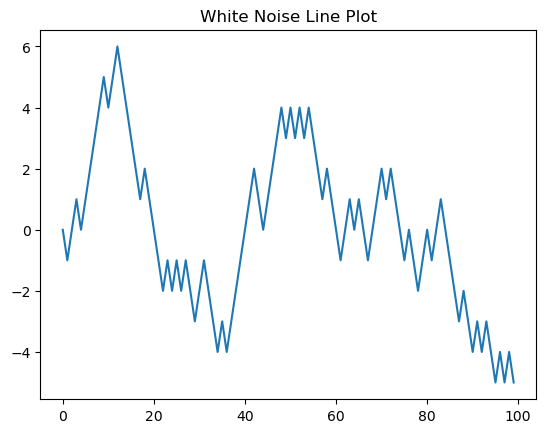

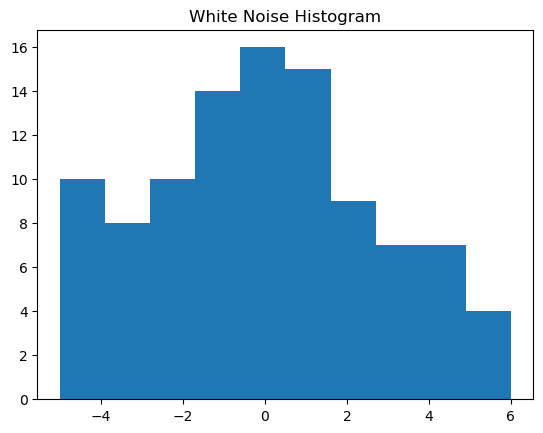

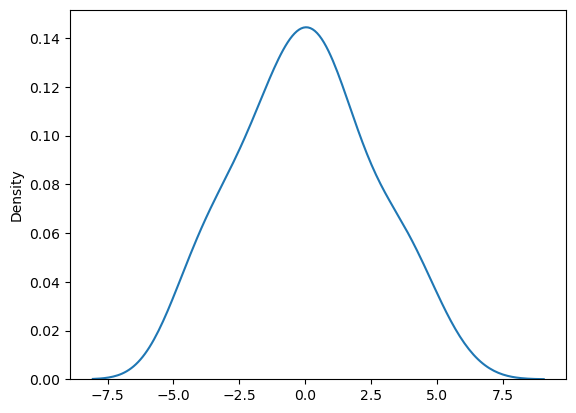

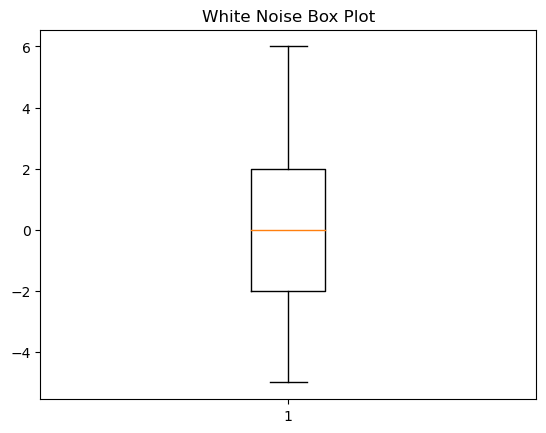

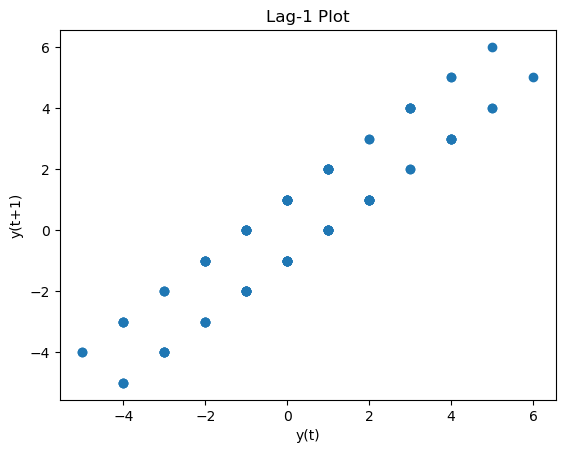

c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


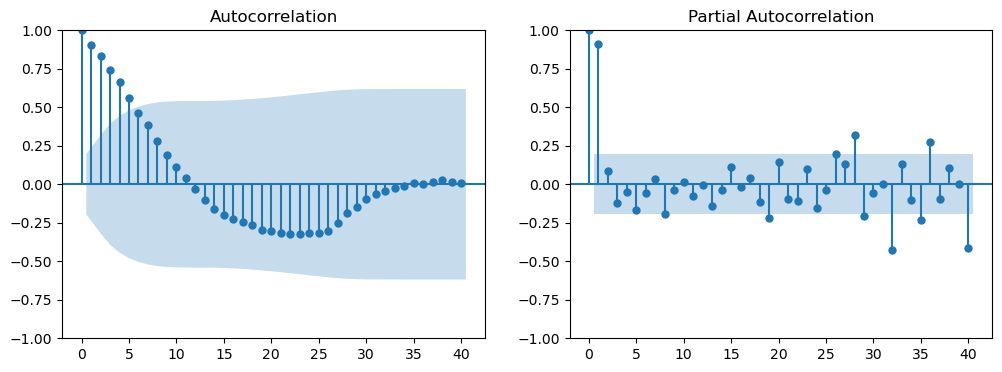

In [7]:
rwactual_mean = rw_series.mean()
rwactual_std = rw_series.std()
print("Actual Mean: ", rwactual_mean)
print("Actual Standard Deviation: ", rwactual_std)

series_plot(rw_series)

### 1.2.3

In [8]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(rw_series, lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,84.282798,4.288301e-20


### 1.2.4

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(rw_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

for key, value in result[4].items():
    print('Critical Values:')
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.469495
p-value: 0.548544
Critical Values:
	1%: -3.498
Critical Values:
	5%: -2.891
Critical Values:
	10%: -2.583


## 1.3 Global land temperature anomalies series

### 1.3.1

In [10]:
from pandas import read_excel
dataset = read_excel('global-land-temperature-anomalies-1880-2020-data.xlsx', 'Data')
dataset.columns = ['Year', 'Temperature']
print(dataset)

     Year  Temperature
0    1881        -0.43
1    1882        -0.46
2    1883        -0.67
3    1884        -0.71
4    1885        -0.58
..    ...          ...
135  2016         1.54
136  2017         1.41
137  2018         1.22
138  2019         1.43
139  2020         1.59

[140 rows x 2 columns]


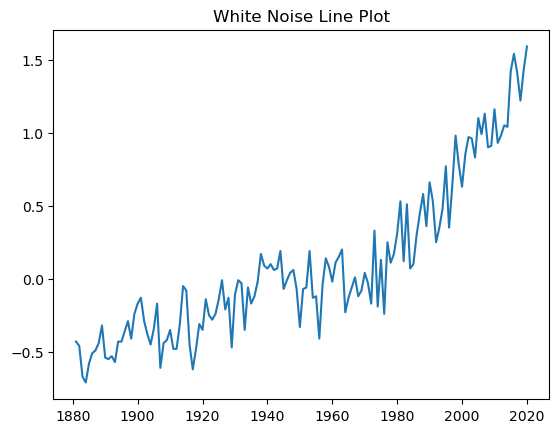

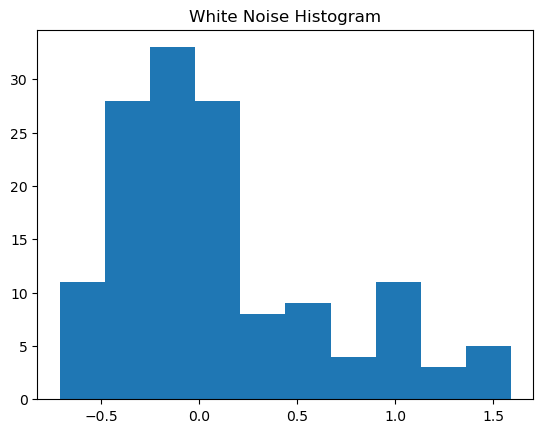

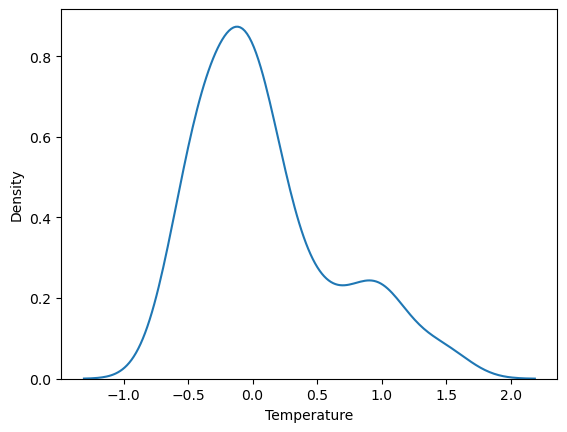

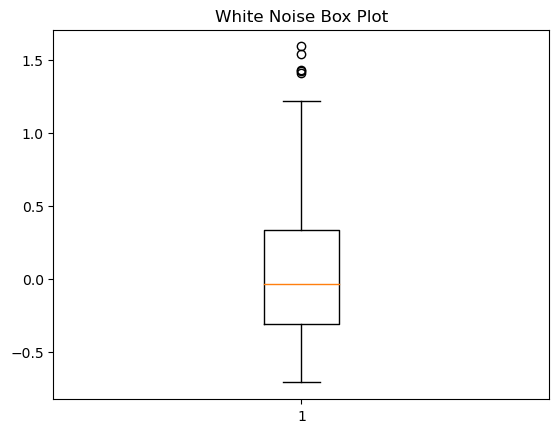

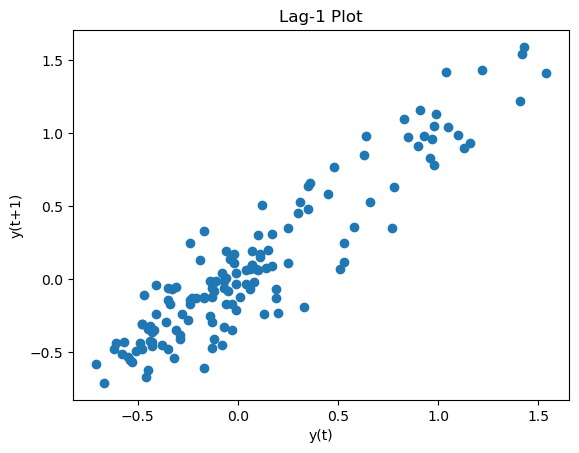

c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


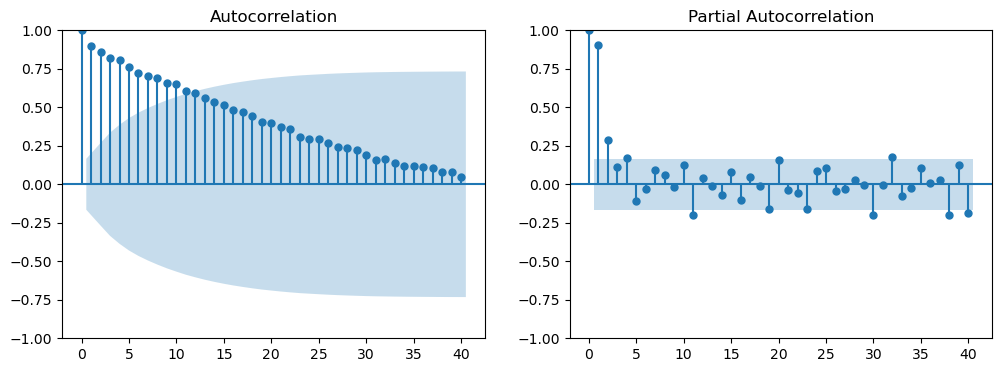

In [11]:
temperature = dataset.iloc[0:,1]
temperature = Series(data=dataset.iloc[0:, 1])
temperature.index = dataset.iloc[0:, 0]
series_plot(temperature)

### 1.3.2

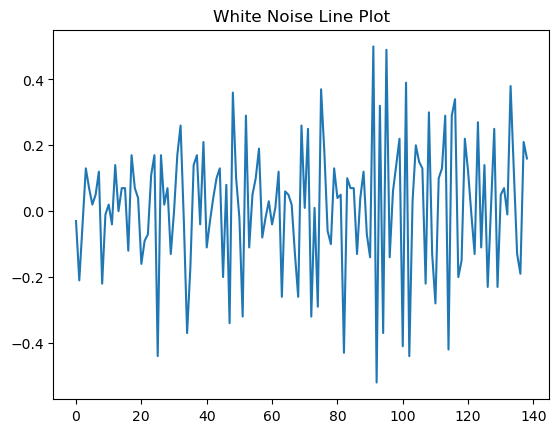

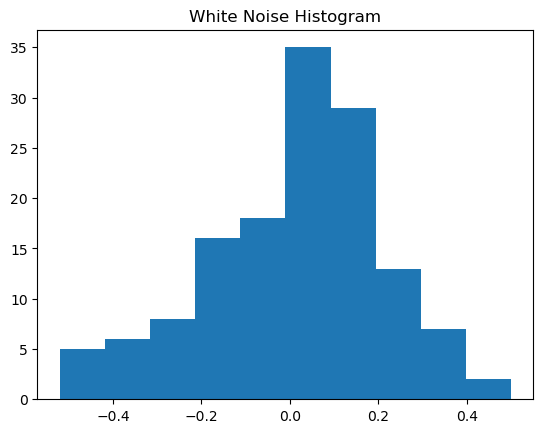

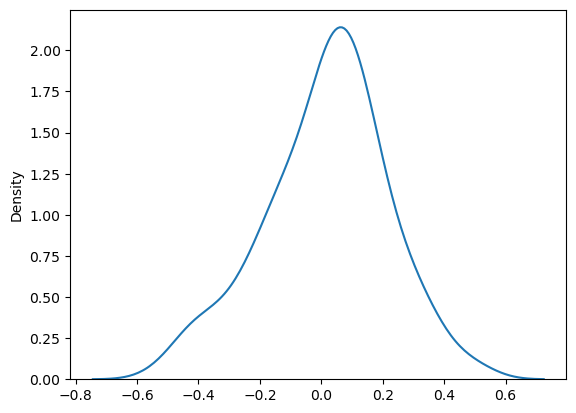

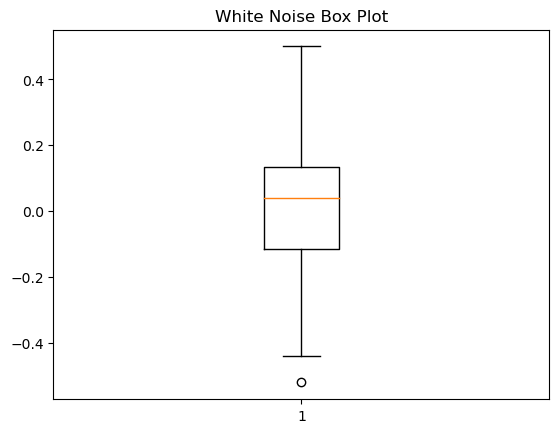

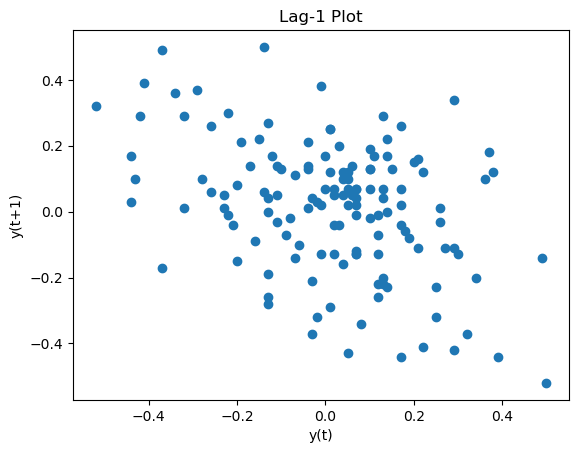

c:\Users\30201\.conda\envs\environ2233\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


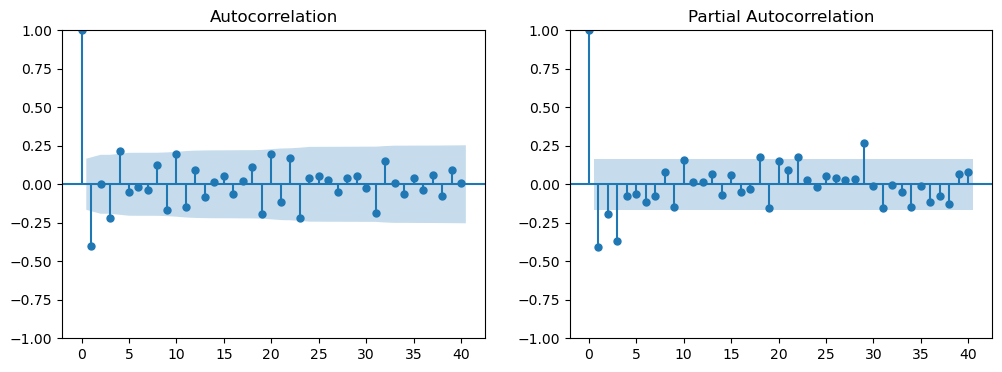

In [30]:

temperature_1order = []
for i in range(139):
    temperature_1order.append(dataset.iloc[i+1,1]-dataset.iloc[i,1])

temperature_1order = Series(temperature_1order)
series_plot(temperature_1order)

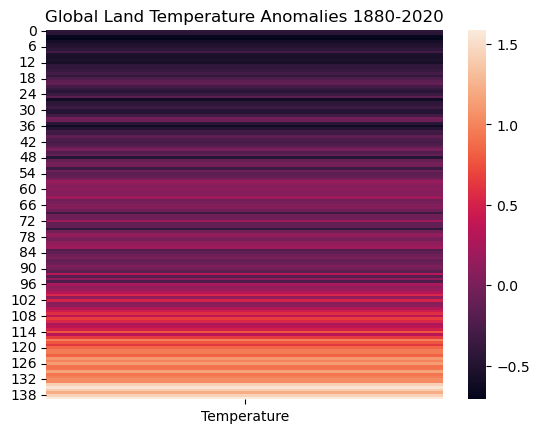

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a pivot table of the data
# plot the heatmap
sns.heatmap(dataset.drop(columns='Year'))
plt.title('Global Land Temperature Anomalies 1880-2020')
plt.show()

### 1.3.3

In [ ]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(temperature, lags=[1], return_df=True)
# lb pvalue < 0.05 (default threshold), then reject the Null hypothesis and accept
#the alternative hypothesis that the series is dependent, meaning that the series is
#not random

,lb_stat,lb_pvalue
1,116.259661,4.169678e-27


In [ ]:
sm.stats.acorr_ljungbox(temperature_1order, lags=[1], return_df=True)
# lb pvalue < 0.05 (default threshold), then reject the Null hypothesis and accept
#the alternative hypothesis that the series is dependent, meaning that the series is
#not random

,lb_stat,lb_pvalue
1,23.320097,0.000001


### 1.3.4

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(temperature)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.938293
p-value: 0.993570
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


p-value is larger than the significance level(0.05), so accept the null hypothesis, and consider that the series is not stationary.

In [ ]:
result = adfuller(temperature_1order)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.165503
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


the p-value is less than the significance level (default value 0.05), then reject the null hypothesis and consider that the series is stationary

### 1.3.5

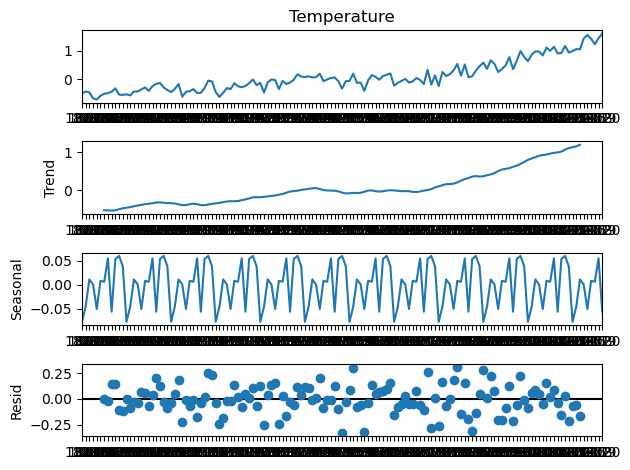

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(temperature, model = 'additive', period=12)
fig = result.plot()


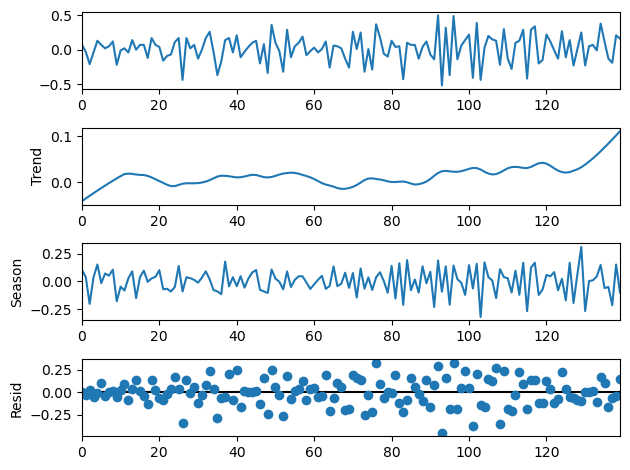

In [ ]:
from statsmodels.tsa.seasonal import STL
from matplotlib import pyplot

res = STL(temperature_1order, period = 12).fit()
res.plot()
pyplot.show()

1. A stationary time series is one whose properties do not depend on the time at which the series is observed. Stationary time series have constant statistical properties over time, such as constant mean and variance, and the covariance between the series and its lags does not depend on time.
2. Yes. One potential technique for transforming a non-stationary series into a stationary one is differencing. Differencing involves taking the difference between consecutive observations in the series. This can be done once or multiple times until the resulting series is stationary. Also it could be decomposed, and the seasonal component could be stationary. (Except for white noise or some data we need higher ordering)
3. No, because p value is larger than 0.05, then we can accept the null hypothesis and judge that the series is not stationary.
4. Yes, because p value is less than 0.05, then we can reject the null hypothesis and judge that the series is stationary.
5. Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting. Trend-cycle component, seasonal component and remainder component are the typical components in a time-series decomposition